In [1]:
###### Applications Lab #3-- ATOC7500 Objective Analysis - eigenfaces
###### last updated February 6, 2018
###### Written by Vineel Yettela, with additional commenting from Jennifer Kay (University of Colorado)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##LEARNING GOALS:
##1) Complete an EOF analysis using Singular Value Decomposition (SVD). 
##2) Provide a qualitative description of the results. 
## What are the eigenvalue, the eigenvector, and the principal component?  
## What do you learn from each one about the space-time structure of your underlying dataset?
##3) Reconstruct the original data using a subset of the EOFs

In [2]:
#load faces. Adapted from the AT&T face database
att_faces = np.load('att_faces.npy')
height, width, n_faces = att_faces.shape
print((height, width, n_faces))

(112, 92, 400)


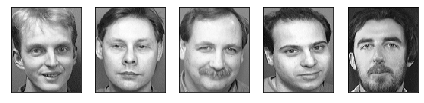

In [3]:
#print a few faces from the database - Look at your data!!
n = 5
fig, axs = plt.subplots(1, n)

random_face_inds = np.random.choice(np.arange(n_faces), n, replace=False)
for i, ax in enumerate(axs):
    ax.imshow(att_faces[:, :, random_face_inds[i]], cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

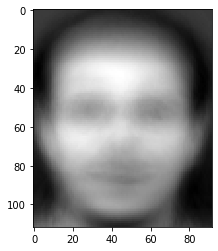

In [4]:
#print the average face
average_face = np.mean(att_faces, axis = 2);
plt.imshow(average_face, cmap = 'gray');

In [8]:
#Construct the data matrix. Samples (different faces) along rows and 
#variables (individual pixels) along columns
print(att_faces.shape)
data_matrix = np.reshape(att_faces, (height*width, n_faces)).T
print(data_matrix.shape)

#Construct anomaly matrix by removing the average face, i.e., 
#by removing the column means from each column of the data_matrix
anomaly_matrix = data_matrix - np.mean(data_matrix, axis=0)
#anomaly_matrix = anomaly_matrix/np.std(anomaly_matrix, axis=0)
[eofs, s, v] = np.linalg.svd(anomaly_matrix.T, full_matrices=False)
print(eofs.shape)

eigenvals = np.square(s)
variance_explained = eigenvals/np.sum(eigenvals)

(112, 92, 400)
(400, 10304)
(10304, 400)
(400,)


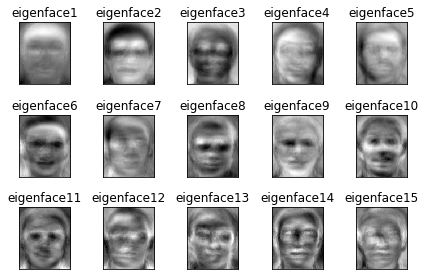

In [9]:
#Plot the top 15 eofs (a.k.a eigenfaces)

fig, axs = plt.subplots(3, 5)

for i, ax in enumerate(np.reshape(axs, 15)):
    eigenface = np.reshape(eofs[:, i], [height, width])
    ax.imshow(eigenface, cmap='gray')
    ax.set_title('eigenface' + str(i+1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

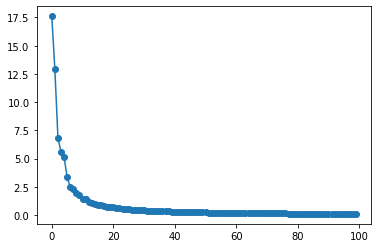

In [10]:
#Plot variance explained by each eigenface
plt.plot(variance_explained[0:100]*100, marker='o')

(400, 400)
(100,)
0
(112, 92)


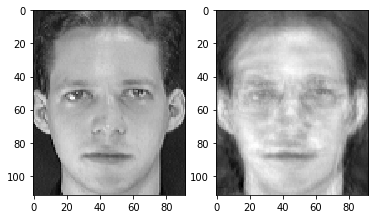

(100,)
10
(112, 92)


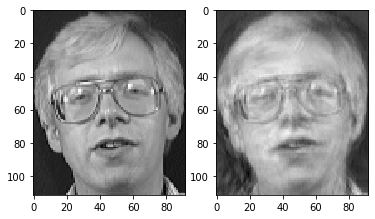

(100,)
20
(112, 92)


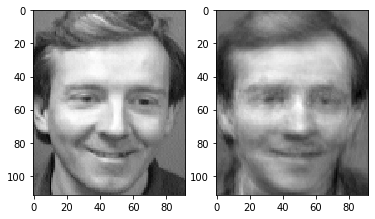

(100,)
30
(112, 92)


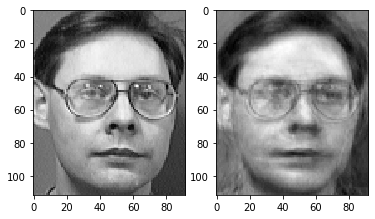

(100,)
40
(112, 92)


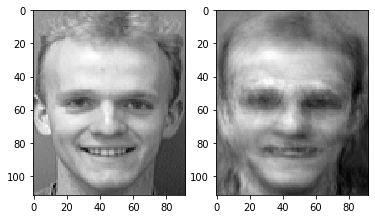

(100,)
50
(112, 92)


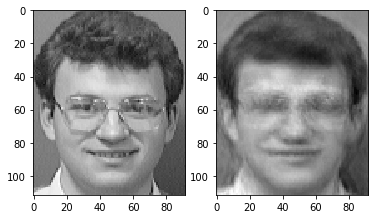

(100,)
60
(112, 92)


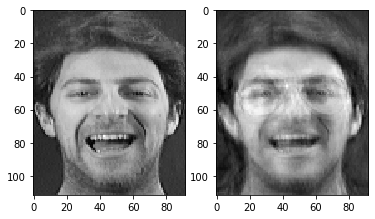

(100,)
70
(112, 92)


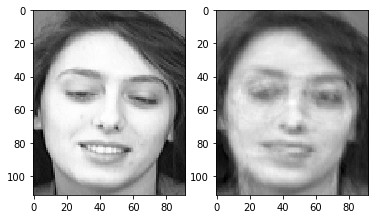

(100,)
80
(112, 92)


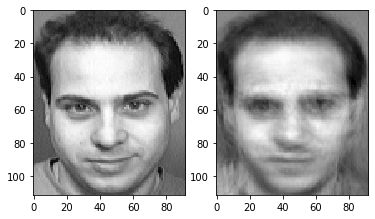

(100,)
90
(112, 92)


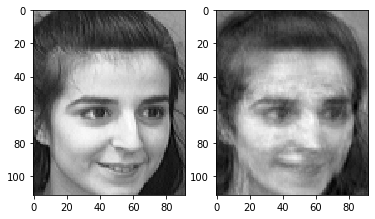

(100,)
100
(112, 92)


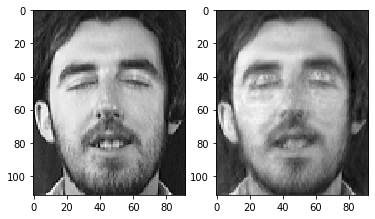

(100,)
110
(112, 92)


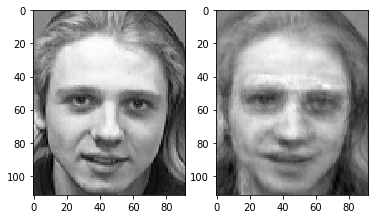

(100,)
120
(112, 92)


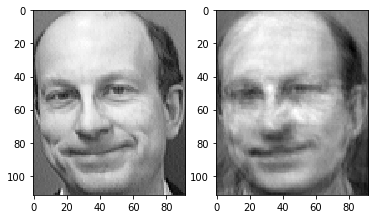

(100,)
130
(112, 92)


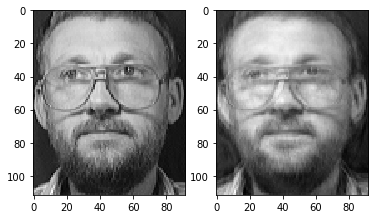

(100,)
140
(112, 92)


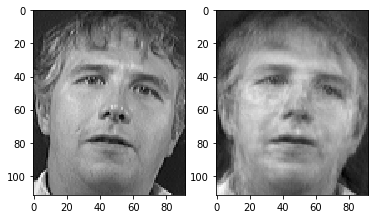

(100,)
150
(112, 92)


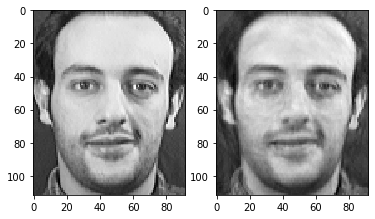

(100,)
160
(112, 92)


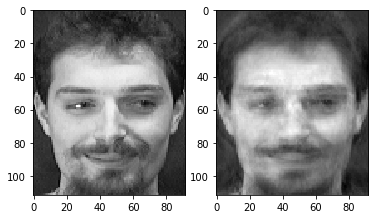

(100,)
170
(112, 92)


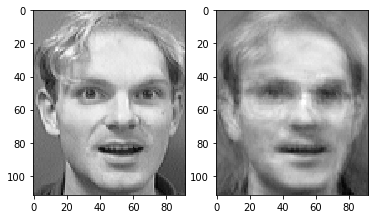

(100,)
180
(112, 92)


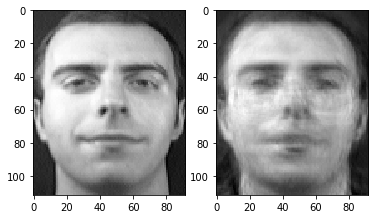

(100,)
190
(112, 92)


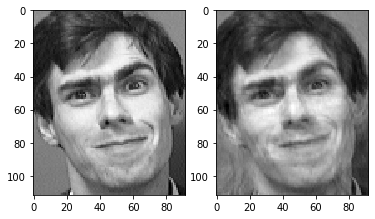

(100,)
200
(112, 92)


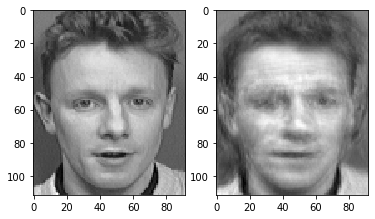

(100,)
210
(112, 92)


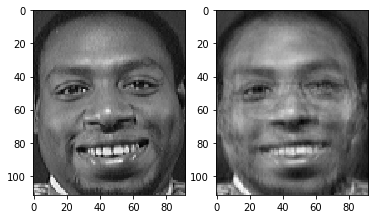

(100,)
220
(112, 92)


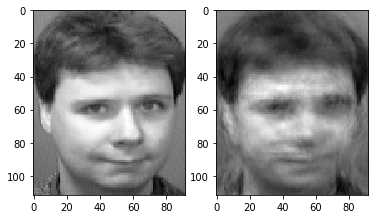

(100,)
230
(112, 92)


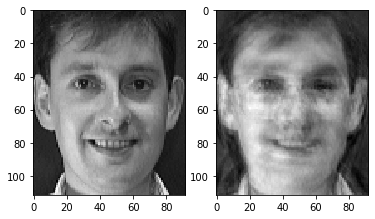

(100,)
240
(112, 92)


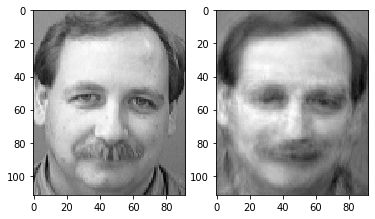

(100,)
250
(112, 92)


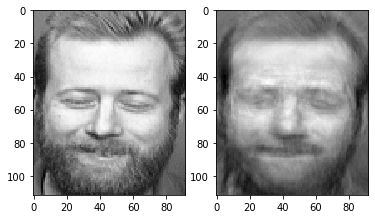

(100,)
260
(112, 92)


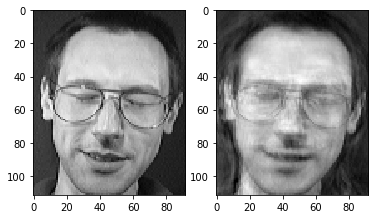

(100,)
270
(112, 92)


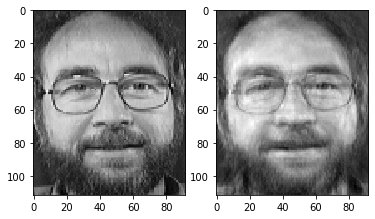

(100,)
280
(112, 92)


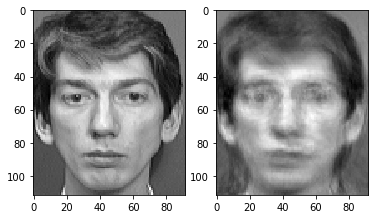

(100,)
290
(112, 92)


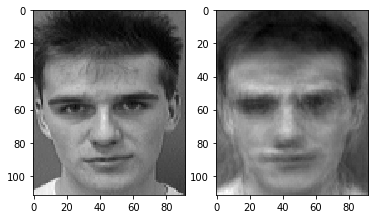

(100,)
300
(112, 92)


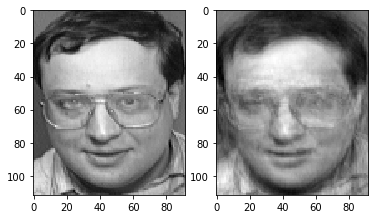

(100,)
310
(112, 92)


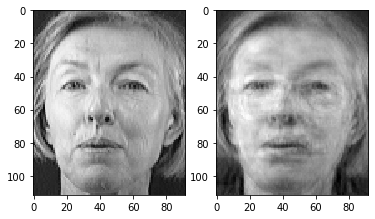

(100,)
320
(112, 92)


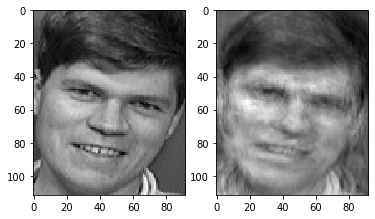

(100,)
330
(112, 92)


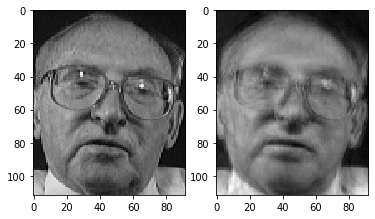

(100,)
340
(112, 92)


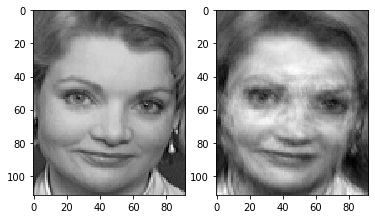

(100,)
350
(112, 92)


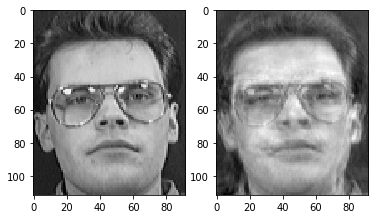

(100,)
360
(112, 92)


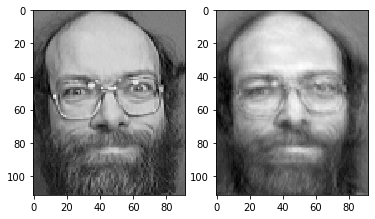

(100,)
370
(112, 92)


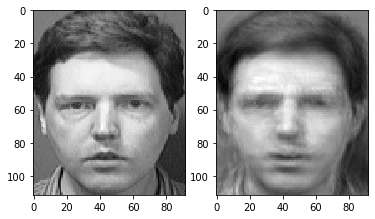

(100,)
380
(112, 92)


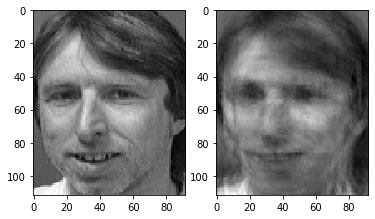

(100,)
390
(112, 92)


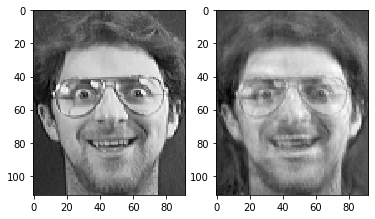

In [46]:
#project the faces onto the eigenfaces
weights = np.dot(anomaly_matrix, eofs)
print(weights.shape)

face_nums = np.arange(0,400,10)
for face_num in face_nums:
#choose a face to reconstruct
    #face_num = 30 #0 to 389
    original_face = att_faces[:, :, face_num]

    #choose number of weights to reconstruct face
    weights_num = 100
    face_weights = weights[face_num, 0:weights_num]
    print(face_weights.shape)
    reconstructed_face = np.dot(eofs[:, 0:weights_num], face_weights)

    #At this point, the reconstructed face is an anomaly face with the average face removed. 
    #Add back the average face to get the original face

    print(face_num)
    reconstructed_face = np.reshape(reconstructed_face, (height, width)) + average_face
    print(reconstructed_face.shape)
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(original_face, cmap='gray');
    axs[1].imshow(reconstructed_face, cmap='gray');
    plt.show()